In [20]:
matrix_filename = '/media/NAS/Central_Lab_Storage/bo-han/Data_Analysis/20210803_wgSNP_in_nanopore/MinType/Nanopore/distmatrix.txt'

In [21]:
data = []
sample_names = []
with open(matrix_filename) as f:
    next(f)
    for line in f:
        values = line.strip().split()
        currect_sample, dists = values[0], values[1:]
        for sample_name, dist in zip(sample_names, dists):
            data.append((currect_sample, sample_name, dist))
            data.append((sample_name, currect_sample, dist))
        data.append((currect_sample, currect_sample, 0))
        sample_names.append(currect_sample)

In [3]:
import re
import sys
import pandas as pd

sys.path.append('../src')
from tree import Dendrogram

In [22]:
df = pd.DataFrame(data).pivot(index=0, columns=1, values=2).astype(int)
df.head()

1,CB12.006.fastq.gz_mapping_results.fsa,CC06.019.fastq.gz_mapping_results.fsa,R13.0899.fastq.gz_mapping_results.fsa,R14.0920.fastq.gz_mapping_results.fsa,R15.0417.fastq.gz_mapping_results.fsa,R16.1966.fastq.gz_mapping_results.fsa,R17.1356.fastq.gz_mapping_results.fsa,R17.3214.fastq.gz_mapping_results.fsa,R17.3233.fastq.gz_mapping_results.fsa,R17.3348.fastq.gz_mapping_results.fsa,...,R18.0255.fastq.gz_mapping_results.fsa,R18.0256.fastq.gz_mapping_results.fsa,R18.0262.fastq.gz_mapping_results.fsa,R18.0275.fastq.gz_mapping_results.fsa,R18.0284.fastq.gz_mapping_results.fsa,SA07.018.fastq.gz_mapping_results.fsa,SA08.118.fastq.gz_mapping_results.fsa,SA09.058.fastq.gz_mapping_results.fsa,SA10.095.fastq.gz_mapping_results.fsa,SA11.047.fastq.gz_mapping_results.fsa
0,,,,,,,,,,,,,,,,,,,,,
CB12.006.fastq.gz_mapping_results.fsa,0,11,8,8,9,18,19,16,21,19,...,18,18,18,23,20,10,4,12,5,14
CC06.019.fastq.gz_mapping_results.fsa,11,0,11,11,12,15,16,13,18,16,...,15,15,15,26,17,7,7,9,8,11
R13.0899.fastq.gz_mapping_results.fsa,8,11,0,8,9,18,19,16,21,19,...,18,18,18,23,20,10,4,12,5,14
R14.0920.fastq.gz_mapping_results.fsa,8,11,8,0,9,18,19,16,21,19,...,18,18,18,23,20,10,4,12,5,14
R15.0417.fastq.gz_mapping_results.fsa,9,12,9,9,0,19,20,17,22,20,...,19,19,19,24,21,11,5,13,6,15


In [23]:
prog = re.compile('\w+.[0-9]+')

In [24]:
df.index = list(map(lambda x: prog.search(x).group(), df.index))
df.columns = list(map(lambda x: prog.search(x).group(), df.columns))
df.head()

,CB12.006,CC06.019,R13.0899,R14.0920,R15.0417,R16.1966,R17.1356,R17.3214,R17.3233,R17.3348,...,R18.0255,R18.0256,R18.0262,R18.0275,R18.0284,SA07.018,SA08.118,SA09.058,SA10.095,SA11.047
CB12.006,0,11,8,8,9,18,19,16,21,19,...,18,18,18,23,20,10,4,12,5,14
CC06.019,11,0,11,11,12,15,16,13,18,16,...,15,15,15,26,17,7,7,9,8,11
R13.0899,8,11,0,8,9,18,19,16,21,19,...,18,18,18,23,20,10,4,12,5,14
R14.0920,8,11,8,0,9,18,19,16,21,19,...,18,18,18,23,20,10,4,12,5,14
R15.0417,9,12,9,9,0,19,20,17,22,20,...,19,19,19,24,21,11,5,13,6,15


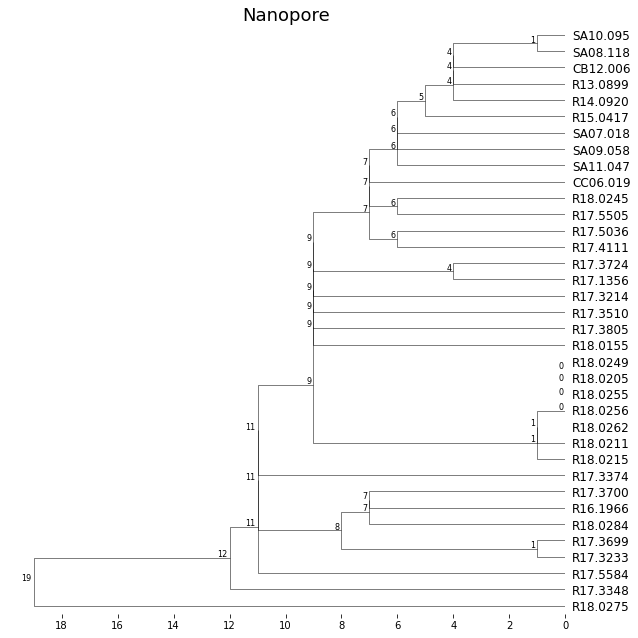

In [25]:
dendrogram = Dendrogram(df)
dendrogram(show_node_info=True)
dendrogram.figure.ax.set_title('Nanopore', fontsize=18)
dendrogram.show_figure()

In [26]:
dendrogram.savefig('/media/NAS/Central_Lab_Storage/bo-han/Data_Analysis/20210803_wgSNP_in_nanopore/MinType/Nanopore/tree.pdf')

In [27]:
dendrogram.to_newick('/media/NAS/Central_Lab_Storage/bo-han/Data_Analysis/20210803_wgSNP_in_nanopore/MinType/Nanopore/tree.newick')